## Data Handling & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import sys
import os

sys.path.append(os.path.abspath("../scripts"))
import data_preprocessing

In [33]:
data_files = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
data_files

,fips_code,county,state,customers_out,run_start_time
0,1037,Coosa,Alabama,12,2014-11-01 04:00:00
1,1051,Elmore,Alabama,7,2014-11-01 04:00:00
2,1109,Pike,Alabama,1,2014-11-01 04:00:00
3,1121,Talladega,Alabama,31,2014-11-01 04:00:00
4,4017,Navajo,Arizona,1,2014-11-01 04:00:00
...,...,...,...,...,...
1689455,55029,Door,Wisconsin,1,2014-12-31 00:00:00
1689456,55079,Milwaukee,Wisconsin,1,2014-12-31 00:00:00
1689457,55093,Pierce,Wisconsin,6,2014-12-31 00:00:00
1689458,55125,Vilas,Wisconsin,6,2014-12-31 00:00:00


In [45]:
def analyze_and_visualize(file):
    df = pd.read_csv(file, parse_dates=["run_start_time"])
    df = df.sort_values(["fips_code", "run_start_time"])  # Sortowanie danych
    
    # 1. Mapa braków danych (liczba zapisanych wartości na hrabstwo)
    fips_counts = df["fips_code"].value_counts()
    missing_fips = all_fips - set(df["fips_code"])  # Hrabstwa, które nie mają danych
    
    plt.figure(figsize=(10, 5))
    sns.histplot(fips_counts, bins=50, kde=True)
    plt.xlabel("Liczba zapisów na hrabstwo")
    plt.ylabel("Liczba hrabstw")
    plt.title("Rozkład liczby zapisów w hrabstwach")
    plt.show()
    
    print(f"Liczba hrabstw bez danych: {len(missing_fips)}")
    
    # 2. Histogram długości przerw w dostawie prądu
    df["Outage_Duration"] = df.groupby("fips_code")["run_start_time"].diff().dt.total_seconds() / 60
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Outage_Duration"].dropna(), bins=50, kde=True)
    plt.xlabel("Czas między zapisami (minuty)")
    plt.ylabel("Liczba wystąpień")
    plt.title("Rozkład przerw w dostawie prądu")
    plt.xlim(0, 500)
    plt.show()
    
    # 3. Wykres czasowy liczby klientów bez prądu
    df_time = df.groupby("run_start_time")["customers_out"].sum()
    plt.figure(figsize=(12, 5))
    df_time.plot()
    plt.xlabel("Czas")
    plt.ylabel("Liczba klientów bez prądu")
    plt.title("Liczba klientów bez prądu w czasie")
    plt.show()


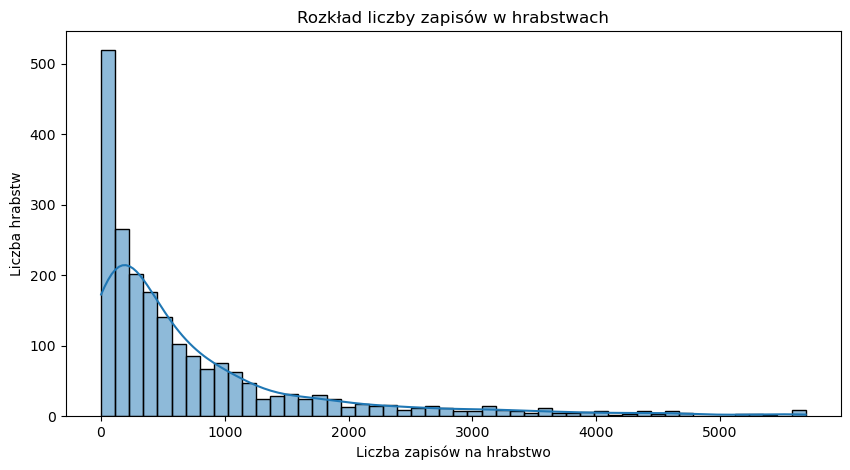

Liczba hrabstw bez danych: 3234


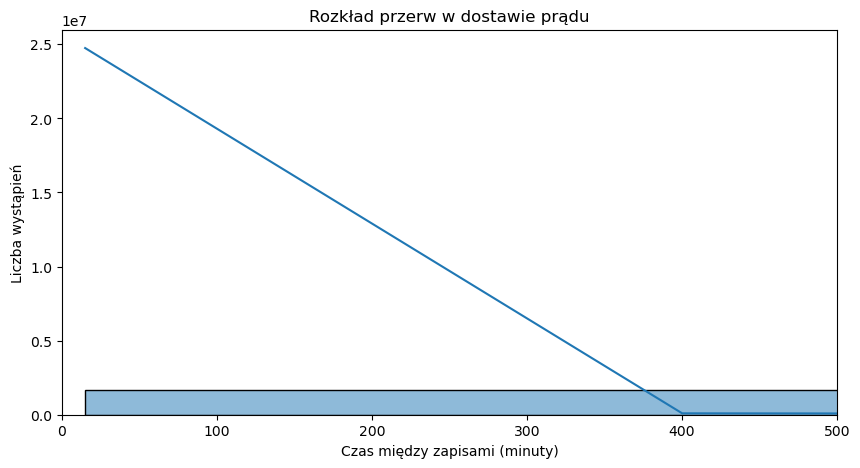

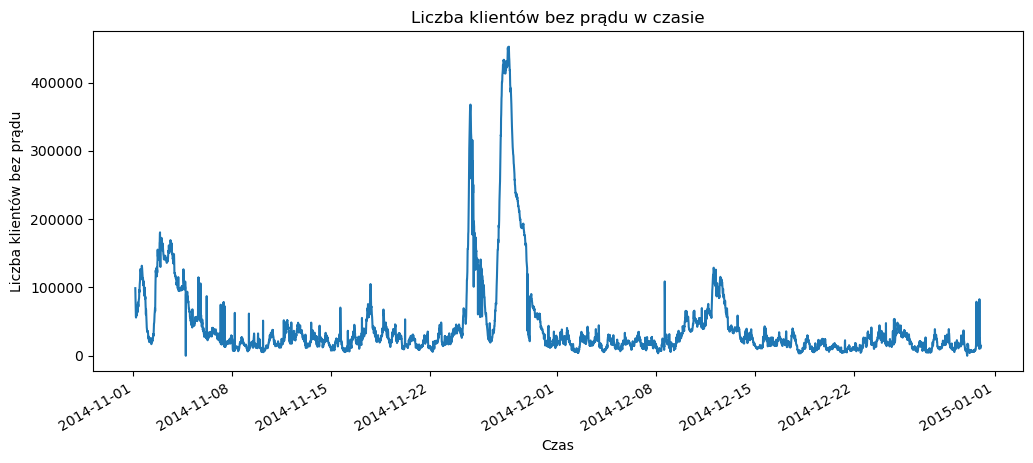

In [47]:
data_files = glob.glob("../data/eaglei_data/eaglei_outages_*.csv")
mcc = pd.read_csv("../data/eaglei_data/MCC.csv")
all_fips = set(mcc["County_FIPS"]) 

analyze_and_visualize(data_files[0])
